In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns



In [ ]:
path_file = "/content/mental_health_finaldata_1.csv"

df_mentalhealth = pd.read_csv(path_file)
print(df_mentalhealth.shape)
df_mentalhealth.head()

(824, 13)


,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [ ]:
#@title Mental Health
columnas_lista = list(df_mentalhealth.columns)
print(columnas_lista)

['Age', 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History', 'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']


In [ ]:
descripcion_numerica = df_mentalhealth.describe()
print(descripcion_numerica)

             Age  Gender Occupation Days_Indoors Growing_Stress  \
count        824     824        824          824            824   
unique         4       2          5            5              3   
top     30-Above  Female  Housewife   31-60 days            Yes   
freq         222     434        185          171            301   

       Quarantine_Frustrations Changes_Habits Mental_Health_History  \
count                      824            824                   824   
unique                       3              3                     3   
top                        Yes            Yes                    No   
freq                       304            305                   284   

       Weight_Change Mood_Swings Coping_Struggles Work_Interest  \
count            824         824              824           824   
unique             3           3                2             3   
top            Maybe      Medium               No            No   
freq             281         280        

In [ ]:
columnas_categoricas = ['Gender', 'Occupation', 'Mental_Health_History']

for columna in columnas_categoricas:
    print(f"Distribución de {columna}:")
    print(df_mentalhealth[columna].value_counts())
    print("\n")

Distribución de Gender:
Gender
Female    434
Male      390
Name: count, dtype: int64


Distribución de Occupation:
Occupation
Housewife    185
Student      180
Corporate    159
Others       155
Business     145
Name: count, dtype: int64


Distribución de Mental_Health_History:
Mental_Health_History
No       284
Maybe    282
Yes      258
Name: count, dtype: int64




In [ ]:
valores_nulos = df_mentalhealth.isnull().sum()
print(valores_nulos)

Age                        0
Gender                     0
Occupation                 0
Days_Indoors               0
Growing_Stress             0
Quarantine_Frustrations    0
Changes_Habits             0
Mental_Health_History      0
Weight_Change              0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
dtype: int64


<ipython-input-8-66876e9e2569>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=df_mentalhealth, palette=sns.color_palette("Set2"))
<ipython-input-8-66876e9e2569>:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.countplot(x='Gender', data=df_mentalhealth, palette=sns.color_palette("Set2"))


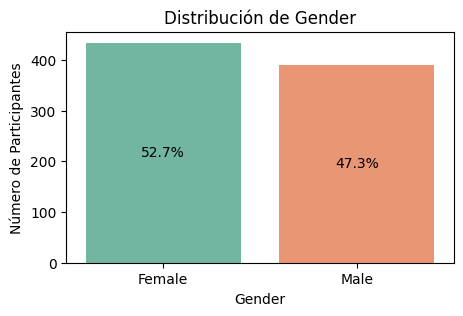

In [ ]:
#@Distribución de variable "Gender"
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='Gender', data=df_mentalhealth, palette=sns.color_palette("Set2"))

# Calcular y agregar los porcentajes dentro de las barras
total = len(df_mentalhealth)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{percentage:.1f}%', ha="center", va='center', color='black')


plt.title('Distribución de Gender')
plt.xlabel('Gender')
plt.ylabel('Número de Participantes')
plt.show()


In [ ]:
#@title Nuevo Dataset - Filtros: 1)Gender = Female 2) Growing Stress = Yes/No
df_2 = df_mentalhealth.query('Gender == "Female" and Growing_Stress != "Maybe"')

<ipython-input-10-0e966b6c9627>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_2, palette='Set2')
<ipython-input-10-0e966b6c9627>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_2, palette='Set2')
<ipython-input-10-0e966b6c9627>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_2, palette='Set2')
<ipython-input-10-0e966b6c9627>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

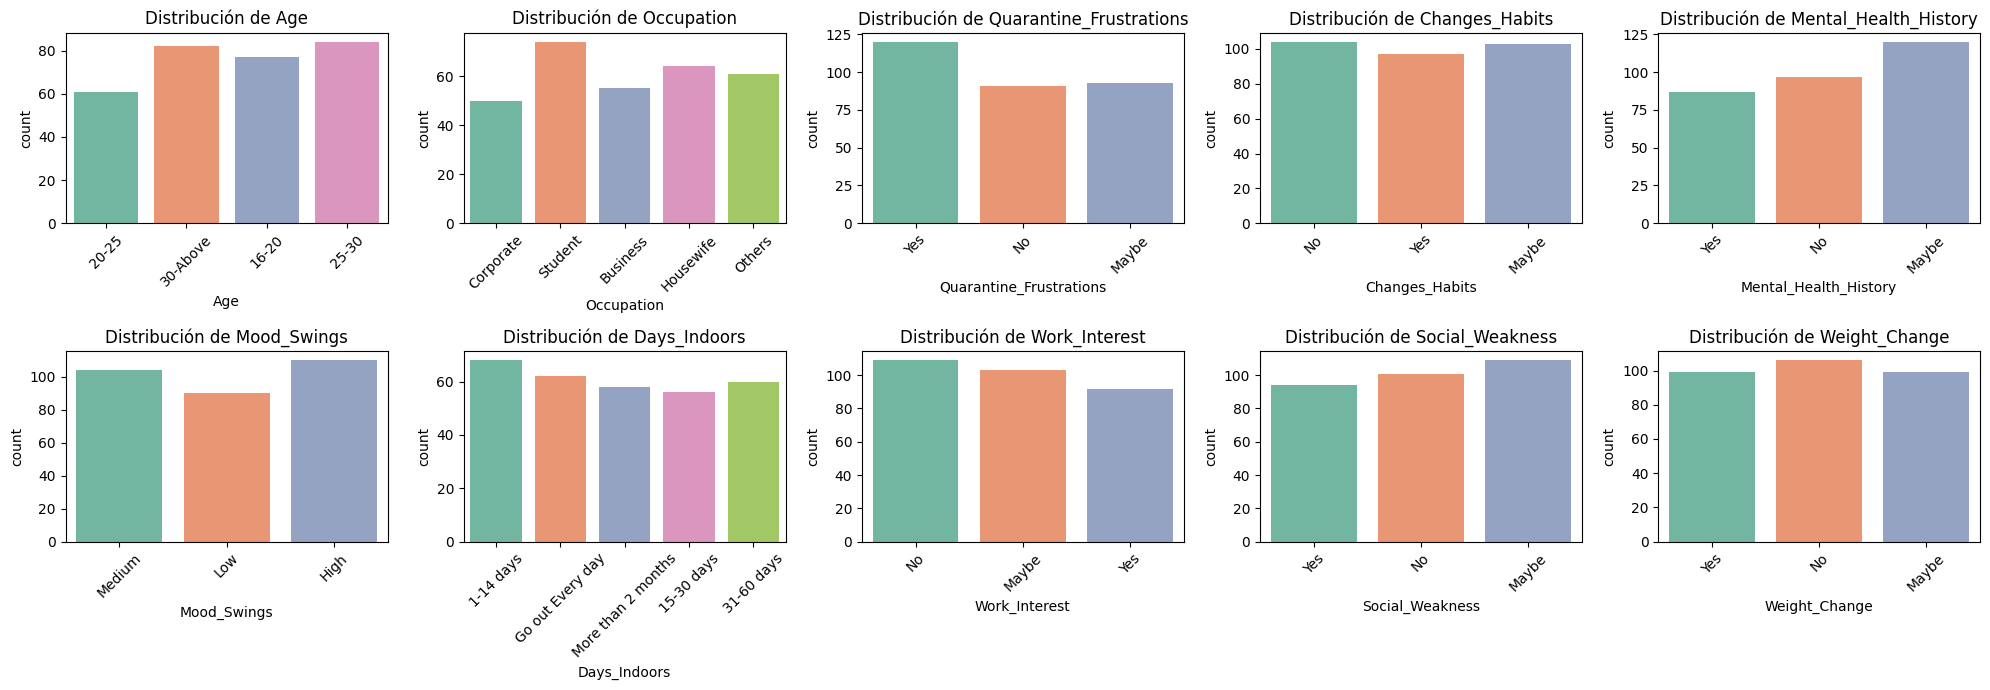

In [ ]:
#@title Distribución de variables categóricas
plt.figure(figsize=(20, 7))
for i, col in enumerate(['Age', 'Occupation', 'Quarantine_Frustrations', 'Changes_Habits',
                       'Mental_Health_History', 'Mood_Swings', 'Days_Indoors',
                       'Work_Interest', 'Social_Weakness', 'Weight_Change']):
    plt.subplot(2, 5, i+1)
    sns.countplot(x=col, data=df_2, palette='Set2')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


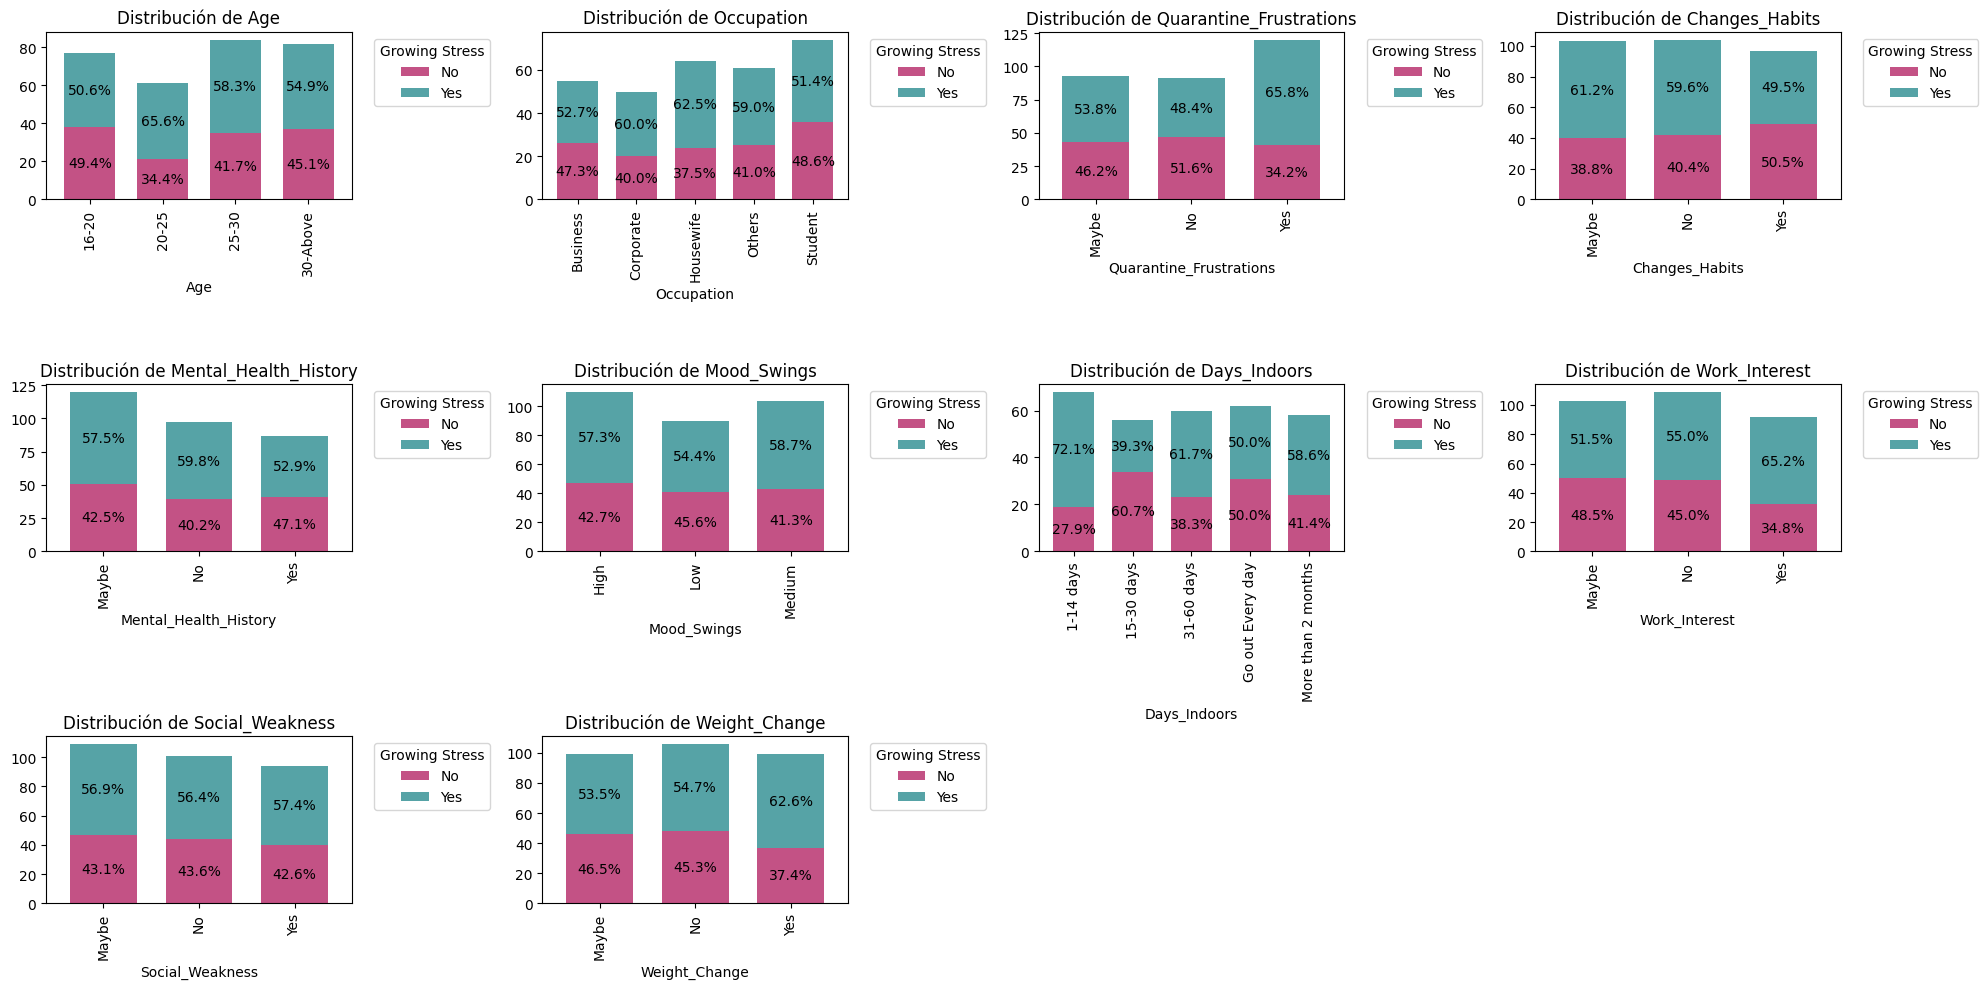

In [ ]:
#@title Relaciones entre las variables vs la variable Growing Stress
categorical_columns = ['Age', 'Occupation', 'Quarantine_Frustrations', 'Changes_Habits',
                       'Mental_Health_History', 'Mood_Swings', 'Days_Indoors',
                       'Work_Interest', 'Social_Weakness', 'Weight_Change']

plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 4, i+1)
    #Tabla de contingencia
    crosstab = pd.crosstab(df_2[col], df_2['Growing_Stress'])

    percentages = (crosstab.div(crosstab.sum(axis=1), axis=0) * 100).round(1)
    colors = ["#C35285", "#56A3A6"]

    #Tabla de contingencia
    ax = crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), color=colors, width=0.7)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    #plt.ylabel('Número de Participantes')
    #plt.xticks(rotation=45)
    plt.legend(title='Growing Stress', bbox_to_anchor=(1.05, 1), loc='upper left')

 #Porcentajes
    for i in range(crosstab.shape[0]):
      for j in range(crosstab.shape[1]):
          ax.text(i, crosstab.iloc[i, :].cumsum()[j] - crosstab.iloc[i, :][j] / 2,
                  str(percentages.iloc[i, j]) + '%',
                  ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

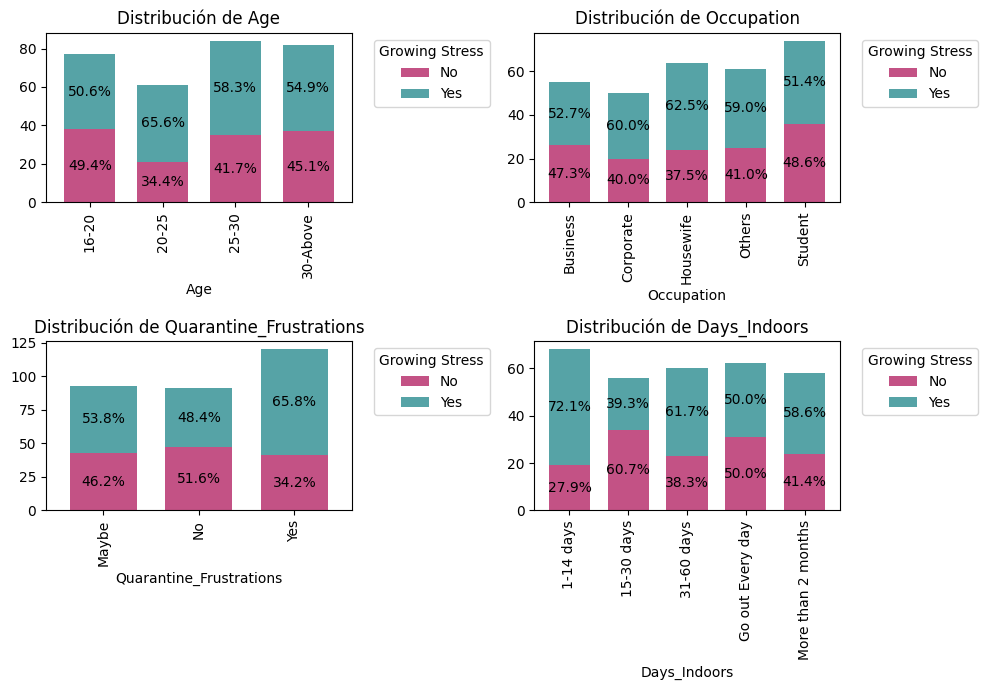

In [ ]:
#@title Relaciones entre las variables más representativas vs la variable Growing Stress
categorical_columns = ['Age', 'Occupation', 'Quarantine_Frustrations', 'Days_Indoors']

plt.figure(figsize=(10, 7))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 2, i+1)
    #Tabla de contingencia
    crosstab = pd.crosstab(df_2[col], df_2['Growing_Stress'])

    percentages = (crosstab.div(crosstab.sum(axis=1), axis=0) * 100).round(1)
    colors = ["#C35285", "#56A3A6"]

    #Tabla de contingencia
    ax = crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), color=colors, width=0.7)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    #plt.ylabel('Número de Participantes')
    #plt.xticks(rotation=45)
    plt.legend(title='Growing Stress', bbox_to_anchor=(1.05, 1), loc='upper left')

 #Porcentajes
    for i in range(crosstab.shape[0]):
      for j in range(crosstab.shape[1]):
          ax.text(i, crosstab.iloc[i, :].cumsum()[j] - crosstab.iloc[i, :][j] / 2,
                  str(percentages.iloc[i, j]) + '%',
                  ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

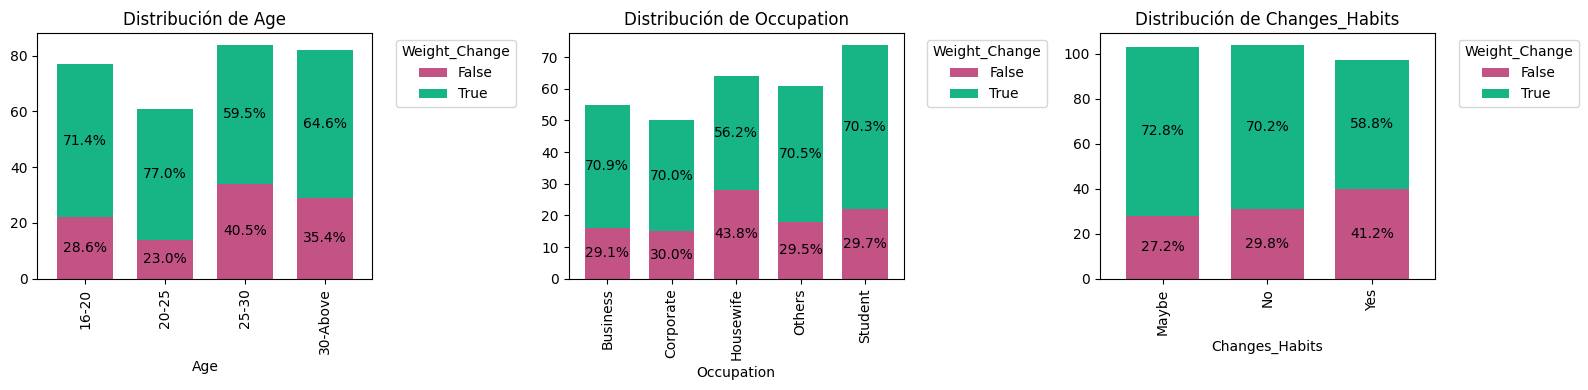

In [ ]:
#@title Otras relaciones entre variables
#@title Relaciones entre las variables vs la variable Growing Stress
categorical_columns = ['Age', 'Occupation', 'Changes_Habits']

plt.figure(figsize=(16, 4))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 3, i+1)
    #Tabla de contingencia
    crosstab = pd.crosstab(df_2[col], df_2['Weight_Change']!="Maybe")

    percentages = (crosstab.div(crosstab.sum(axis=1), axis=0) * 100).round(1)
    colors = ["#C35285", "#17B586"]

    #Tabla de contingencia
    ax = crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), color=colors, width=0.7)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    #plt.ylabel('Número de Participantes')
    #plt.xticks(rotation=45)
    plt.legend(title='Weight_Change', bbox_to_anchor=(1.05, 1), loc='upper left')

 #Porcentajes
    for i in range(crosstab.shape[0]):
      for j in range(crosstab.shape[1]):
          ax.text(i, crosstab.iloc[i, :].cumsum()[j] - crosstab.iloc[i, :][j] / 2,
                  str(percentages.iloc[i, j]) + '%',
                  ha='center', va='center', color='black')

plt.tight_layout()
plt.show()